<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>CapstoneProject - Best Restaurant to work in Fortaleza-Brazil </font></h1>

## Introduction/description of the problem

-Kalil is a Master student in Technical Logistics in Germany. After the corona crisis, the brazilian currency had a strong fluctutiation and Kalil has to go back to his parents house due to the financial crisis. 

-However, Kalil did not finished his master and he must work to survive. He has professional skills in the cuisine and he had the idea to work in restaurants for a short period until the situation become better and he goes back to Germany and finish his master.

-The question is, in which restaurant should he look for a work? The core of the problem is that Kalil does not have money. In order to saving money, kalil muss avoid spend money with transportation and oder expenses. Then, he needs to work nearby and in a good restaurant with the idea to get bigger tips (Mostly the tips are an obligation in Brazil and normally is included in the payment). 

Premisses are:

- Restaurants nearby
- Restaurants with good reputation
- Restaurants can be accessed by foot (without bus, car, bike)
- Kalil does not remember the locations in Fortaleza, so he needs the locations plot in a Map for orientation




## Data

Data description: the data used to solve this problem is geocode, and it is obtained from FourSquare. Explanation and  the steps, with examples, of the data is the following. Data is a single dataframe containing locations nearby the parent's house of Kalil. Primarly data is based on the lat,lng and radius(2km). Some other metadata like name, categories, area, post code, distances and so on is also collected, but let us discuss that some of them are not  necessary for the analysis. 

Example of the data:

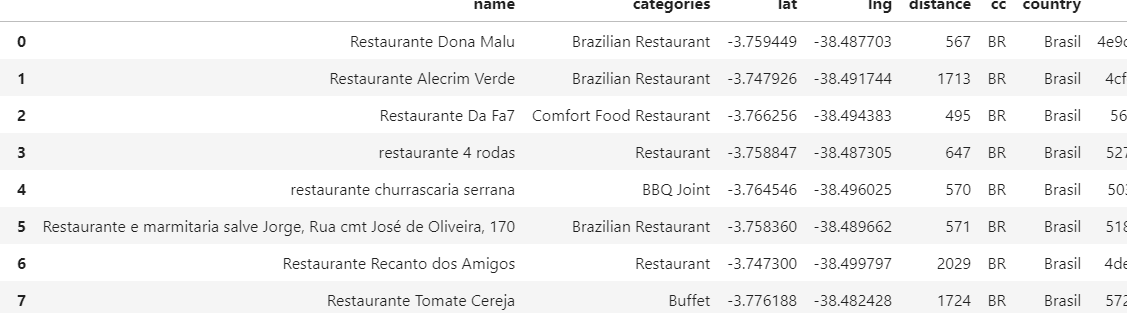

The data will be used to orientate kalil on his choice. Which Restaurant is the best option for him? Which is closer? Which has the best access? Which has the best rating? and so on

### Import necessary Libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

### Define Foursquare Credentials and Version

##### Make sure that you have created a Foursquare developer account and have your credentials handy

In [51]:
CLIENT_ID = 'EZTP0DUNMD3TKQDJDOQFXN3ORJU4FCB5W4RG4DLMVDCGRGFT' # your Foursquare ID
CLIENT_SECRET = 'E12WSECYOLAAVMEKS0KSMWJYG4XUQMFZJQ305DCV4N1VLW1E' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EZTP0DUNMD3TKQDJDOQFXN3ORJU4FCB5W4RG4DLMVDCGRGFT
CLIENT_SECRET:E12WSECYOLAAVMEKS0KSMWJYG4XUQMFZJQ305DCV4N1VLW1E


#### Let's again assume that you are staying at the Conrad hotel. So let's start by converting the Contrad Hotel's address to its latitude and longitude coordinates.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>foursquare_agent</em>, as shown below.

In [52]:
address = 'Rua Jornalista Cesar Magalhães, 666'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-3.7633031 -38.4910458


<a id="item1"></a>

## 1. Search for a specific venue category
> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

#### Now, let's assume that it is lunch time, and you are craving Italian food. So, let's define a query to search for Italian food that is within 500 metres from the Conrad Hotel. 

In [53]:
search_query = 'restaurant'
radius = 2000
print(search_query + ' .... OK!')

restaurant .... OK!


#### Define the corresponding URL

In [54]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=EZTP0DUNMD3TKQDJDOQFXN3ORJU4FCB5W4RG4DLMVDCGRGFT&client_secret=E12WSECYOLAAVMEKS0KSMWJYG4XUQMFZJQ305DCV4N1VLW1E&ll=-3.7633031,-38.4910458&v=20180604&query=restaurant&radius=2000&limit=30'

#### Send the GET Request and examine the results

In [55]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ed91bbc963d29001b63e5e3'},
 'response': {'venues': [{'id': '4e9d9eb72c5b8638e57d7daa',
    'name': 'Restaurante Dona Malu',
    'location': {'lat': -3.7594491890431607,
     'lng': -38.487703193511834,
     'labeledLatLngs': [{'label': 'display',
       'lat': -3.7594491890431607,
       'lng': -38.487703193511834}],
     'distance': 567,
     'cc': 'BR',
     'country': 'Brasil',
     'formattedAddress': ['Brasil']},
    'categories': [{'id': '4bf58dd8d48988d16b941735',
      'name': 'Brazilian Restaurant',
      'pluralName': 'Brazilian Restaurants',
      'shortName': 'Brazilian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/argentinian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1591287151',
    'hasPerk': False},
   {'id': '4cfe445b2c1aa0907422067a',
    'name': 'Restaurante Alecrim Verde',
    'location': {'address': 'Rua henriqueta galeno 920',
     'lat': -3.7479258834779627,
     'lng

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [56]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.address,location.postalCode,location.city,location.state
0,4e9d9eb72c5b8638e57d7daa,Restaurante Dona Malu,"[{'id': '4bf58dd8d48988d16b941735', 'name': 'Brazilian Restaurant', 'pluralName': 'Brazilian Restaurants', 'shortName': 'Brazilian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/argentinian_', 'suffix': '.png'}, 'primary': True}]",v-1591287151,False,-3.759449,-38.487703,"[{'label': 'display', 'lat': -3.7594491890431607, 'lng': -38.487703193511834}]",567,BR,Brasil,[Brasil],NaN,NaN,NaN,NaN
1,4cfe445b2c1aa0907422067a,Restaurante Alecrim Verde,"[{'id': '4bf58dd8d48988d16b941735', 'name': 'Brazilian Restaurant', 'pluralName': 'Brazilian Restaurants', 'shortName': 'Brazilian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/argentinian_', 'suffix': '.png'}, 'primary': True}]",v-1591287151,False,-3.747926,-38.491744,"[{'label': 'display', 'lat': -3.7479258834779627, 'lng': -38.49174431913736}]",1713,BR,Brasil,"[Rua henriqueta galeno 920, Fortaleza, CE, 60135-420, Brasil]",Rua henriqueta galeno 920,60135-420,Fortaleza,CE
2,563ccfeecd10bfc081e30a20,Restaurante Da Fa7,"[{'id': '52e81612bcbc57f1066b7a00', 'name': 'Comfort Food Restaurant', 'pluralName': 'Comfort Food Restaurants', 'shortName': 'Comfort Food', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}]",v-1591287151,False,-3.766256,-38.494383,"[{'label': 'display', 'lat': -3.766255879406433, 'lng': -38.4943828993284}]",495,BR,Brasil,[Brasil],NaN,NaN,NaN,NaN
3,52791a8b498e214e9f44f815,restaurante 4 rodas,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'Restaurant', 'pluralName': 'Restaurants', 'shortName': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}]",v-1591287151,False,-3.758847,-38.487305,"[{'label': 'display', 'lat': -3.75884747505188, 'lng': -38.4873046875}]",647,BR,Brasil,[Brasil],NaN,NaN,NaN,NaN
4,50358c52e4b0cf42407560f7,restaurante churrascaria serrana,"[{'id': '4bf58dd8d48988d1df931735', 'name': 'BBQ Joint', 'pluralName': 'BBQ Joints', 'shortName': 'BBQ', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bbqalt_', 'suffix': '.png'}, 'primary': True}]",v-1591287151,False,-3.764546,-38.496025,"[{'label': 'display', 'lat': -3.764546196986964, 'lng': -38.496025284214525}]",570,BR,Brasil,[Brasil],NaN,NaN,NaN,NaN


In [62]:
dataframe.shape

(30, 16)

#### Define information of interest and filter dataframe

In [63]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,address,postalCode,city,state,id
0,Restaurante Dona Malu,Brazilian Restaurant,-3.759449,-38.487703,"[{'label': 'display', 'lat': -3.7594491890431607, 'lng': -38.487703193511834}]",567,BR,Brasil,[Brasil],NaN,NaN,NaN,NaN,4e9d9eb72c5b8638e57d7daa
1,Restaurante Alecrim Verde,Brazilian Restaurant,-3.747926,-38.491744,"[{'label': 'display', 'lat': -3.7479258834779627, 'lng': -38.49174431913736}]",1713,BR,Brasil,"[Rua henriqueta galeno 920, Fortaleza, CE, 60135-420, Brasil]",Rua henriqueta galeno 920,60135-420,Fortaleza,CE,4cfe445b2c1aa0907422067a
2,Restaurante Da Fa7,Comfort Food Restaurant,-3.766256,-38.494383,"[{'label': 'display', 'lat': -3.766255879406433, 'lng': -38.4943828993284}]",495,BR,Brasil,[Brasil],NaN,NaN,NaN,NaN,563ccfeecd10bfc081e30a20
3,restaurante 4 rodas,Restaurant,-3.758847,-38.487305,"[{'label': 'display', 'lat': -3.75884747505188, 'lng': -38.4873046875}]",647,BR,Brasil,[Brasil],NaN,NaN,NaN,NaN,52791a8b498e214e9f44f815
4,restaurante churrascaria serrana,BBQ Joint,-3.764546,-38.496025,"[{'label': 'display', 'lat': -3.764546196986964, 'lng': -38.496025284214525}]",570,BR,Brasil,[Brasil],NaN,NaN,NaN,NaN,50358c52e4b0cf42407560f7
5,"Restaurante e marmitaria salve Jorge, Rua cmt José de Oliveira, 170",Brazilian Restaurant,-3.758360,-38.489662,"[{'label': 'display', 'lat': -3.7583597, 'lng': -38.489662}]",571,BR,Brasil,[Brasil],NaN,NaN,NaN,NaN,5183e155498e448ef51b3f99
6,Restaurante Recanto dos Amigos,Restaurant,-3.747300,-38.499797,"[{'label': 'display', 'lat': -3.7473003060229173, 'lng': -38.49979729225605}]",2029,BR,Brasil,"[Rua Leonardo Mota, 2486, Fortaleza, CE, 60170-041, Brasil]","Rua Leonardo Mota, 2486",60170-041,Fortaleza,CE,4de66c6fd1648041649f33b1
7,Restaurante Tomate Cereja,Buffet,-3.776188,-38.482428,"[{'label': 'display', 'lat': -3.7761877192548865, 'lng': -38.482428186827136}]",1724,BR,Brasil,"[Rua Luiza Miranda Coelho 1555, Fortaleza, CE, 60811-110, Brasil]",Rua Luiza Miranda Coelho 1555,60811-110,Fortaleza,CE,572cf0de498ea4b92e314c1c
8,Restaurante Republica,BBQ Joint,-3.767888,-38.494655,"[{'label': 'display', 'lat': -3.7678875947065262, 'lng': -38.49465492214674}]",648,BR,Brasil,[Brasil],NaN,NaN,NaN,NaN,50e5a4ece4b06f58a73ba41f
9,Restaurante do Forum,Cafeteria,-3.773601,-38.478194,"[{'label': 'display', 'lat': -3.773600866484024, 'lng': -38.47819400665982}]",1830,BR,Brasil,"[R. Desembargador Floriano Benevides, 220, Fortaleza, CE, 60811-690, Brasil]","R. Desembargador Floriano Benevides, 220",60811-690,Fortaleza,CE,4fa93f5ee4b007be2cc77ed2


In [110]:
fortaleza_df1 = dataframe_filtered.drop(['labeledLatLngs', 'formattedAddress','address','postalCode','city','state',], axis=1)
fortaleza_df1


,name,categories,lat,lng,distance,cc,country,id
0,Restaurante Dona Malu,Brazilian Restaurant,-3.759449,-38.487703,567,BR,Brasil,4e9d9eb72c5b8638e57d7daa
1,Restaurante Alecrim Verde,Brazilian Restaurant,-3.747926,-38.491744,1713,BR,Brasil,4cfe445b2c1aa0907422067a
2,Restaurante Da Fa7,Comfort Food Restaurant,-3.766256,-38.494383,495,BR,Brasil,563ccfeecd10bfc081e30a20
3,restaurante 4 rodas,Restaurant,-3.758847,-38.487305,647,BR,Brasil,52791a8b498e214e9f44f815
4,restaurante churrascaria serrana,BBQ Joint,-3.764546,-38.496025,570,BR,Brasil,50358c52e4b0cf42407560f7
5,"Restaurante e marmitaria salve Jorge, Rua cmt José de Oliveira, 170",Brazilian Restaurant,-3.758360,-38.489662,571,BR,Brasil,5183e155498e448ef51b3f99
6,Restaurante Recanto dos Amigos,Restaurant,-3.747300,-38.499797,2029,BR,Brasil,4de66c6fd1648041649f33b1
7,Restaurante Tomate Cereja,Buffet,-3.776188,-38.482428,1724,BR,Brasil,572cf0de498ea4b92e314c1c
8,Restaurante Republica,BBQ Joint,-3.767888,-38.494655,648,BR,Brasil,50e5a4ece4b06f58a73ba41f
9,Restaurante do Forum,Cafeteria,-3.773601,-38.478194,1830,BR,Brasil,4fa93f5ee4b007be2cc77ed2


In [111]:
fortaleza_df= fortaleza_df1.sort_values(by=['distance'])
fortaleza_df

,name,categories,lat,lng,distance,cc,country,id
2,Restaurante Da Fa7,Comfort Food Restaurant,-3.766256,-38.494383,495,BR,Brasil,563ccfeecd10bfc081e30a20
0,Restaurante Dona Malu,Brazilian Restaurant,-3.759449,-38.487703,567,BR,Brasil,4e9d9eb72c5b8638e57d7daa
4,restaurante churrascaria serrana,BBQ Joint,-3.764546,-38.496025,570,BR,Brasil,50358c52e4b0cf42407560f7
5,"Restaurante e marmitaria salve Jorge, Rua cmt José de Oliveira, 170",Brazilian Restaurant,-3.758360,-38.489662,571,BR,Brasil,5183e155498e448ef51b3f99
3,restaurante 4 rodas,Restaurant,-3.758847,-38.487305,647,BR,Brasil,52791a8b498e214e9f44f815
8,Restaurante Republica,BBQ Joint,-3.767888,-38.494655,648,BR,Brasil,50e5a4ece4b06f58a73ba41f
15,Restaurante Recanto,Restaurant,-3.769754,-38.484266,1040,BR,Brasil,53a42a06498ea4bed5a9ac26
21,Restaurante Barcelona,Brazilian Restaurant,-3.754247,-38.483712,1296,BR,Brasil,509eea6ae4b01718b2ee95a1
14,Restaurante e Lanchonete Petit Bom,Brazilian Restaurant,-3.771442,-38.482640,1301,BR,Brasil,4e94e6566d8689834d758cf8
20,Restaurante estrela,Diner,-3.771364,-38.482413,1313,BR,Brasil,4ffc446ee4b09736bd11d339


#### Let's visualize the Italian restaurants that are nearby

In [131]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=14) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(fortaleza_df.lat, fortaleza_df.lng, fortaleza_df.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
#venues_map

## Overal rating

In [124]:
#lets check the closest one
venue_id = '563ccfeecd10bfc081e30a20' # ID of Restaurante da fa7
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/563ccfeecd10bfc081e30a20?client_id=EZTP0DUNMD3TKQDJDOQFXN3ORJU4FCB5W4RG4DLMVDCGRGFT&client_secret=E12WSECYOLAAVMEKS0KSMWJYG4XUQMFZJQ305DCV4N1VLW1E&v=20180604'

#### Send GET request for result

In [125]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'likes', 'dislike', 'ok', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'seasonalHours', 'pageUpdates', 'inbox', 'attributes'])


{'id': '563ccfeecd10bfc081e30a20',
 'name': 'Restaurante Da Fa7',
 'contact': {},
 'location': {'lat': -3.766255879406433,
  'lng': -38.4943828993284,
  'labeledLatLngs': [{'label': 'display',
    'lat': -3.766255879406433,
    'lng': -38.4943828993284}],
  'cc': 'BR',
  'country': 'Brasil',
  'formattedAddress': ['Brasil']},
 'canonicalUrl': 'https://foursquare.com/v/restaurante-da-fa7/563ccfeecd10bfc081e30a20',
 'categories': [{'id': '52e81612bcbc57f1066b7a00',
   'name': 'Comfort Food Restaurant',
   'pluralName': 'Comfort Food Restaurants',
   'shortName': 'Comfort Food',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'tipCount': 0},
 'likes': {'count': 0, 'groups': []},
 'dislike': False,
 'ok': False,
 'allowMenuUrlEdit': True,
 'beenHere': {'count': 0,
  'unconfirmedCount': 0,
  'marked': False,
  'lastCheckinExpiredAt': 0},
 'specials': {'count': 0, 'items': []},
 'photos'

In [160]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.') #id of the closest one - Restaurante da Fa7

This venue has not been rated yet.


In [161]:
venue_id = '4e9d9eb72c5b8638e57d7daa' # ID of Dona Malu

url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.4


In [163]:
venue_id = '50358c52e4b0cf42407560f7' # ID of ERestaurante Churrascaria Serrana
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


<a id="item2"></a>

## Get the number of tips

In [140]:
result['response']['venue']['tips']['count']

0

## 4. Explore a location
> `https://api.foursquare.com/v2/venues/`**explore**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&limit=`**LIMIT**

#### So, you just finished your gourmet dish at Ecco, and are just curious about the popular spots around the restaurant. In order to explore the area, let's start by getting the latitude and longitude values of Ecco Restaurant.

In [141]:
latitude = -3.759449
longitude = -38.487703

#### Define URL

In [142]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=EZTP0DUNMD3TKQDJDOQFXN3ORJU4FCB5W4RG4DLMVDCGRGFT&client_secret=E12WSECYOLAAVMEKS0KSMWJYG4XUQMFZJQ305DCV4N1VLW1E&ll=-3.759449,-38.487703&v=20180604&radius=2000&limit=30'

#### Send GET request and examine results

In [143]:
import requests

In [144]:
results = requests.get(url).json()
'There are {} around Dona Malu restaurant.'.format(len(results['response']['groups'][0]['items']))

'There are 30 around Dona Malu restaurant.'

#### Get relevant part of JSON

In [146]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4b94132bf964a520286634e3',
  'name': 'Saraiva MegaStore',
  'location': {'address': 'Shopping Center Iguatemi',
   'crossStreet': 'Shopping Iguatemi - Loja 6',
   'lat': -3.757714949097218,
   'lng': -38.488261262561416,
   'labeledLatLngs': [{'label': 'display',
     'lat': -3.757714949097218,
     'lng': -38.488261262561416}],
   'distance': 202,
   'postalCode': '60811-340',
   'cc': 'BR',
   'city': 'Fortaleza',
   'state': 'CE',
   'country': 'Brasil',
   'formattedAddress': ['Shopping Center Iguatemi (Shopping Iguatemi - Loja 6)',
    'Fortaleza, CE',
    '60811-340',
    'Brasil']},
  'categories': [{'id': '4bf58dd8d48988d114951735',
    'name': 'Bookstore',
    'pluralName': 'Bookstores',
    'shortName': 'Bookstore',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/bookstore_',
     'suffix': '.png

#### Process JSON and convert it to a clean dataframe

In [147]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Saraiva MegaStore,Bookstore,Shopping Center Iguatemi,Shopping Iguatemi - Loja 6,-3.757715,-38.488261,"[{'label': 'display', 'lat': -3.757714949097218, 'lng': -38.488261262561416}]",202,60811-340,BR,Fortaleza,CE,Brasil,"[Shopping Center Iguatemi (Shopping Iguatemi - Loja 6), Fortaleza, CE, 60811-340, Brasil]",NaN,4b94132bf964a520286634e3
1,Greenlife Family Club Academia,Gym / Fitness Center,"Avenida Coronel Miguel Dias, 200 - Guararapes",NaN,-3.759317,-38.488339,"[{'label': 'display', 'lat': -3.7593166597769536, 'lng': -38.48833903215285}]",72,60810-160,BR,Fortaleza,CE,Brasil,"[Avenida Coronel Miguel Dias, 200 - Guararapes, Fortaleza, CE, 60810-160, Brasil]",NaN,57fba918498ed8ace1612628
2,Empório Brownie,Dessert Shop,Shopping Iguatemi,NaN,-3.757121,-38.488586,"[{'label': 'display', 'lat': -3.7571210767965693, 'lng': -38.488585764712916}]",277,NaN,BR,Fortaleza,CE,Brasil,"[Shopping Iguatemi, Fortaleza, CE, Brasil]",NaN,4e95d0a76c25df8da7c98373
3,La Frontera,Mexican Restaurant,"Rua Eliseu Uchoa Becca, 450",NaN,-3.761136,-38.486534,"[{'label': 'display', 'lat': -3.761135608063281, 'lng': -38.48653443514369}]",228,NaN,BR,Fortaleza,CE,Brasil,"[Rua Eliseu Uchoa Becca, 450, Fortaleza, CE, Brasil]",NaN,5647c2ac498e83af8e280751
4,Yozenn,Frozen Yogurt Shop,Shopping Iguatemi,NaN,-3.757109,-38.488610,"[{'label': 'display', 'lat': -3.757109152021592, 'lng': -38.48861027681697}]",279,60811-340,BR,Fortaleza,CE,Brasil,"[Shopping Iguatemi, Fortaleza, CE, 60811-340, Brasil]",NaN,5249cd1611d28686cf52416f
5,Calvin Klein Jeans,Boutique,Shopping Center Iguatemi,"Piso superior, Lj. 519",-3.757518,-38.488253,"[{'label': 'display', 'lat': -3.7575179778495476, 'lng': -38.48825283025476}]",223,60811-340,BR,Fortaleza,CE,Brasil,"[Shopping Center Iguatemi (Piso superior, Lj. 519), Fortaleza, CE, 60811-340, Brasil]",NaN,4ccb95e664a6199c6f3a14c1
6,Shopping Center Iguatemi,Shopping Mall,"Av. Washington Soares, 85",NaN,-3.756287,-38.488711,NaN,369,60811-340,BR,Fortaleza,CE,Brasil,"[Av. Washington Soares, 85, Fortaleza, CE, 60811-340, Brasil]",NaN,4b632514f964a5202d662ae3
7,Santa Grelha Iguatemi,Bistro,Shopping Iguatemi,NaN,-3.756413,-38.489297,"[{'label': 'display', 'lat': -3.7564127299080576, 'lng': -38.48929731794352}]",381,NaN,BR,Fortaleza,CE,Brasil,"[Shopping Iguatemi, Fortaleza, CE, Brasil]",NaN,555a126a498e352448be25b0
8,Ibis Fortaleza Centro de Eventos,Hotel,"Rua Firmino Rocha De Aguiar, 1799",NaN,-3.763138,-38.485757,"[{'label': 'display', 'lat': -3.7631384886042896, 'lng': -38.485756805010396}]",464,60810-165,BR,Fortaleza,CE,Brasil,"[Rua Firmino Rocha De Aguiar, 1799, Fortaleza, CE, 60810-165, Brasil]",NaN,5683d714498ea2caa9d7581d
9,Tio Armênio - Iguatemi,Restaurant,NaN,NaN,-3.756800,-38.488995,"[{'label': 'display', 'lat': -3.756800489596541, 'lng': -38.48899542932136}]",327,NaN,BR,NaN,NaN,Brasil,[Brasil],NaN,55c938cd498efb5581ee44c9


#### Let's visualize these items on the map around our location

In [148]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


# add dona malu as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Dona Malu',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

<a id="item5"></a>

In [149]:
# define URL
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

# send GET request and get trending venues
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ed92969216785001b22c122'},
 'response': {'venues': []}}

### Check if any venues are trending at this time

In [156]:
if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

In [157]:
# display trending venues
trending_venues_df

'No trending venues are available at the moment!'

Now, depending on when you run the above code, you might get different venues since the venues with the highest foot traffic are fetched live. 

### Visualize trending venues

In [158]:
if len(results['response']['venues']) == 0:
    venues_map = 'Cannot generate visual as no trending venues are available at the moment!'

else:
    venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


    # add Ecco as a red circle mark
    folium.features.CircleMarker(
        [latitude, longitude],
        radius=10,
        popup='Ecco',
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)


    # add the trending venues as blue circle markers
    for lat, lng, label in zip(trending_venues_df['location.lat'], trending_venues_df['location.lng'], trending_venues_df['name']):
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            poup=label,
            fill=True,
            color='blue',
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(venues_map)

In [159]:
# display map
venues_map

'Cannot generate visual as no trending venues are available at the moment!'

<a id="item6"></a>

### Thank you for completing this lab!

This notebook was created by [Alex Aklson](https://www.linkedin.com/in/aklson/). I hope you found this lab interesting and educational. Feel free to contact me if you have any questions!

This notebook is part of a course on **Coursera** called *Applied Data Science Capstone*. If you accessed this notebook outside the course, you can take this course online by clicking [here](http://cocl.us/DP0701EN_Coursera_Week2_LAB1).

<hr>
Copyright &copy; 2018 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).